In [1]:
import pandas as pd
import numpy as np

##### 비만율 데이터 분석

In [10]:
df = pd.read_csv("data/fat_rate.csv")
df.head()

,구분별(1),구분별(2),구분별(3),2009,2009.1,2009.2,2010,2010.1,2010.2,2011,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,구분별(1),구분별(2),구분별(3),전체,남자,여자,전체,남자,여자,전체,...,여자,전체,남자,여자,전체,남자,여자,전체,남자,여자
1,서울시,소계,소계,21.3,27.7,15.2,21.7,28.5,15.1,22.7,...,23.0,28.9,38.6,19.7,28.6,38.5,19.4,29.5,39.7,20.0
2,서울시,생애주기별,19~29세,13.7,21.2,6.2,13.1,21.5,4.6,15.4,...,11.1,23.2,35.1,11.8,23.5,35.1,12.5,24.2,35.3,13.9
3,서울시,생애주기별,30~44세,22.7,34.1,10.9,22.9,34.5,10.9,23.6,...,15.5,31.2,46.7,15.3,31.1,46.7,15.5,33.7,49.8,17.2
4,서울시,생애주기별,45~64세,24.1,27.7,20.7,24.4,28.7,20.3,25.5,...,25.2,30.3,40.6,20.8,30.2,40.5,20.7,29.6,40.0,20.1


In [11]:
df.columns

Index(['구분별(1)', '구분별(2)', '구분별(3)', '2009', '2009.1', '2009.2', '2010',
       '2010.1', '2010.2', '2011', '2011.1', '2011.2', '2012', '2012.1',
       '2012.2', '2013', '2013.1', '2013.2', '2014', '2014.1', '2014.2',
       '2015', '2015.1', '2015.2', '2016', '2016.1', '2016.2', '2017',
       '2017.1', '2017.2', '2018', '2018.1', '2018.2', '2019', '2019.1',
       '2019.2', '2020', '2020.1', '2020.2', '2021', '2021.1', '2021.2',
       '2022', '2022.1', '2022.2'],
      dtype='object')

#### 연령대가 19세에서 44세까지의 비만율 데이터만 선택하여 비교

In [12]:
df_target = df[(df["구분별(3)"]=="19~29세") | (df["구분별(3)"]=="30~44세")]
target_col = ["2017","2018","2019","2020","2021","2022"]
df_target = df_target[target_col]

###### 비만율이 상승하고 있는 것을 확인할 수 있음

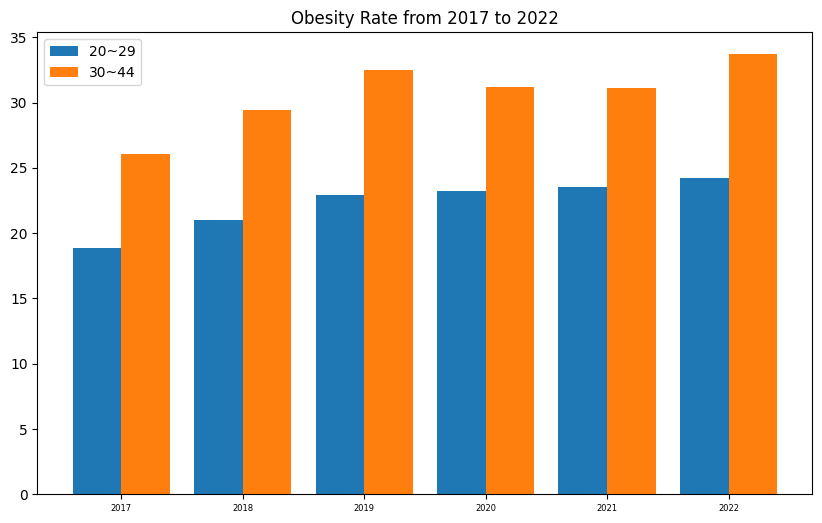

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y1 = df_target.iloc[0, :].values.astype("float")       # 첫 번째 데이터 세트
y2 = df_target.iloc[1, :].values.astype("float")
width = 0.4    
plt.figure(figsize= (10,6))
plt.bar(x - width/2, y1, width=width, label="20~29") 
plt.bar(x + width/2, y2, width=width, label="30~44") 
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 6)
plt.title("Obesity Rate from 2017 to 2022")
plt.legend()
plt.show()

##### 네이버 검색어 트렌드 데이터 
###### 데이터를 Min-Max scale을 통한 데이터 전처리가 이미 되어있고, 최소값과 최대값에 대한 정보가 없어 원래값을 알 수 없지만, 지정한 검색어 증가 혹은 감소를 살펴볼 수 있음

In [16]:
df_dessert=pd.read_excel("data/dessert_trend.xlsx")

c:\Users\JPJ\anaconda3\envs\sqc\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


##### 데이터 전처리

In [17]:
df_dessert = pd.DataFrame(df_dessert.iloc[6:])
colnames = ["date","rate"]
df_dessert = df_dessert.rename(columns = {df_dessert.columns[0]: colnames[0], df_dessert.columns[1]:colnames[1]})
df_dessert

In [23]:
df_dessert["date"] = pd.to_datetime(df_dessert["date"])
df_dessert["year"] = df_dessert["date"].dt.year
df_dessert["rate"] = df_dessert["rate"].astype("float")
a = df_dessert.groupby("year")["rate"].sum()
a = a.reset_index()
a

,year,rate
0,2017,8231.86095
1,2018,9318.42133
2,2019,9771.60768
3,2020,11981.41158
4,2021,13547.01628
5,2022,15374.95732


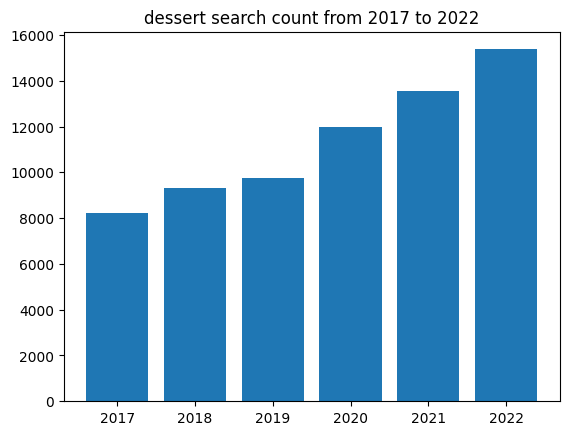

In [24]:
plt.bar(a["year"],a["rate"])
plt.title("dessert search count from 2017 to 2022")
plt.show()

##### 유산소 신체활동 실천율 추이

In [31]:
activity = pd.read_csv("data\유산소_신체활동_실천율_추이_20241223161235.csv",encoding="cp949")
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별(1)   73 non-null     object
 1   특성별(1)  73 non-null     object
 2   특성별(2)  73 non-null     object
 3   2017    73 non-null     object
 4   2017.1  73 non-null     object
 5   2017.2  73 non-null     object
 6   2018    73 non-null     object
 7   2018.1  73 non-null     object
 8   2018.2  73 non-null     object
 9   2019    73 non-null     object
 10  2019.1  73 non-null     object
 11  2019.2  73 non-null     object
 12  2020    73 non-null     object
 13  2020.1  73 non-null     object
 14  2020.2  73 non-null     object
 15  2021    73 non-null     object
 16  2021.1  73 non-null     object
 17  2021.2  73 non-null     object
 18  2022    73 non-null     object
 19  2022.1  73 non-null     object
 20  2022.2  73 non-null     object
dtypes: object(21)
memory usage: 12.1+ KB


In [32]:
activity.head()

,성별(1),특성별(1),특성별(2),2017,2017.1,2017.2,2018,2018.1,2018.2,2019,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,성별(1),특성별(1),특성별(2),응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),...,표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차
1,전체,전체,19세이상,5810,46.4,1.0,5962,44.9,1.0,5918,...,0.9,5398,44.0,0.9,5316,44.9,0.9,4861,49.7,1.0
2,전체,전체,19세이상(표준화),5810,48.5,0.9,5962,47.6,1.0,5918,...,1.0,5398,45.6,0.9,5316,47.9,0.9,4861,53.1,1.0
3,전체,연령별1,19-29세,704,65.6,2.0,748,63.8,2.4,723,...,2.1,778,57.8,1.9,658,61.2,2.1,584,69.2,2.1
4,전체,연령별1,30-39세,857,47.5,2.1,881,50.7,2.2,882,...,2.1,733,47.1,2.2,623,51.0,2.1,611,55.3,2.4


In [35]:
activity["특성별(2)"].unique()

array(['특성별(2)', '19세이상', '19세이상(표준화)', '19-29세', '30-39세', '40-49세',
       '50-59세', '60-69세', '70세이상', '19-64세', '65세이상', '동', '읍면', '하',
       '중하', '중', '중상', '상'], dtype=object)

In [90]:
activity_pr = activity[(activity["특성별(2)"]=="19-29세") | (activity["특성별(2)"]=="30-39세") | (activity["특성별(2)"]=="40-49세")]
activity_pr = activity_pr[activity["성별(1)"]=="전체"]
activity_pr

C:\Users\JPJ\AppData\Local\Temp\ipykernel_12976\1055870809.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  activity_pr = activity_pr[activity['성별(1)']=='전체']


,성별(1),특성별(1),특성별(2),2017,2017.1,2017.2,2018,2018.1,2018.2,2019,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
3,전체,연령별1,19-29세,704,65.6,2.0,748,63.8,2.4,723,...,2.1,778,57.8,1.9,658,61.2,2.1,584,69.2,2.1
4,전체,연령별1,30-39세,857,47.5,2.1,881,50.7,2.2,882,...,2.1,733,47.1,2.2,623,51.0,2.1,611,55.3,2.4
5,전체,연령별1,40-49세,1061,47.5,1.9,1081,45.8,1.8,1076,...,1.6,916,42.8,1.5,911,47.6,1.8,802,49.8,1.9


In [91]:
activity_pr = activity_pr[["특성별(2)","2017.1","2018.1","2019.1","2020.1","2021.1","2022.1"]]
activity_pr

,특성별(2),2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
3,19-29세,65.6,63.8,62.1,57.8,61.2,69.2
4,30-39세,47.5,50.7,49.2,47.1,51.0,55.3
5,40-49세,47.5,45.8,45.3,42.8,47.6,49.8


##### 활동량의 경우 연령대가 30대와 40대가 나뉘어져 있고, 비만율의 경우 30~44세로 범주화가 되어있으므로 활동량 데이터의 40-49세의 값과 30-39세의 값을 합산하되, 40-49세의 값을 절반으로 나누어 합산하였다.

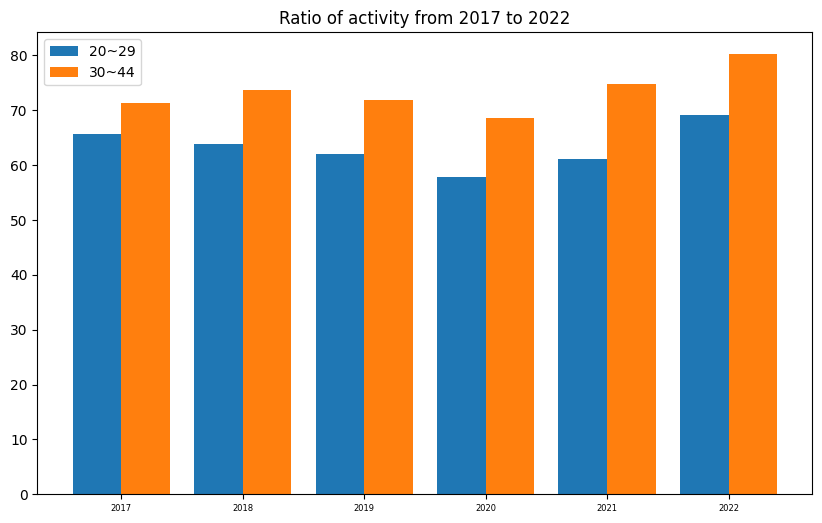

In [92]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y1 = activity_pr.iloc[0, 1:].values.astype("float")       # 첫 번째 데이터 세트
y2 = activity_pr.iloc[1, 1:].values.astype("float")+(activity_pr.iloc[2, 1:].values.astype("float"))/2
width = 0.4    
plt.figure(figsize= (10,6))
plt.bar(x - width/2, y1, width=width, label="20~29") 
plt.bar(x + width/2, y2, width=width, label="30~44") 
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 6)
plt.title("Ratio of activity from 2017 to 2022")
plt.legend()
plt.show()

##### 규칙적 체육활동 참여 여부 및 빈도 데이터

In [86]:
exercise = pd.read_csv("data\규칙적_체육활동_참여_여부_및_빈도_20241223161138.csv",encoding="cp949")
exercise.head()

,통계분류(1),통계분류(2),통계분류(3),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,...,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10
0,통계분류(1),통계분류(2),통계분류(3),전혀하지않는다,월2~3회,주1회,주2회,주3회,주4회,주5회,...,월3회 이하,주1회,주2회,주3회,주4회,주5회,주 6회,매일,주1회 이상,주2회 이상
1,전체,소계,소계,28.9,11.9,11,10.1,17.1,5.7,9.3,...,9.3,13.1,15.5,17.4,6,5.1,1,3,61.2,48.1
2,도시규모별,대도시,소계,28.4,11.7,10.5,8,20.2,5.9,9.5,...,9.9,11.6,15.9,18.5,8.6,5.1,1.2,1.5,62.4,50.8
3,도시규모별,중소도시,소계,28.9,12.2,11.5,12.4,14.9,5.4,9,...,9,15.7,14.8,16.9,4.1,5.5,0.9,3.7,61.5,45.8
4,도시규모별,읍 면 이하,소계,30,11.6,11.4,10.3,14.6,5.9,9.8,...,8.6,11.4,16.1,16.1,4.2,4.4,0.8,5,58,46.6


In [87]:

exercise = exercise[exercise["통계분류(1)"]=="연령별"]
exercise = exercise[(exercise["통계분류(2)"]=="20대") | (exercise["통계분류(2)"]=="30대")|(exercise["통계분류(2)"]=="40대")]
exercise = exercise[["통계분류(2)","2017","2018","2019","2020","2021","2022"]]
exercise

,통계분류(2),2017,2018,2019,2020,2021,2022
8,20대,29.9,30.8,23.8,30.3,27.6,28.7
9,30대,28.8,29.6,23.1,31.8,32.1,25.5
10,40대,25.5,23.5,22.5,26.5,23.6,25.2


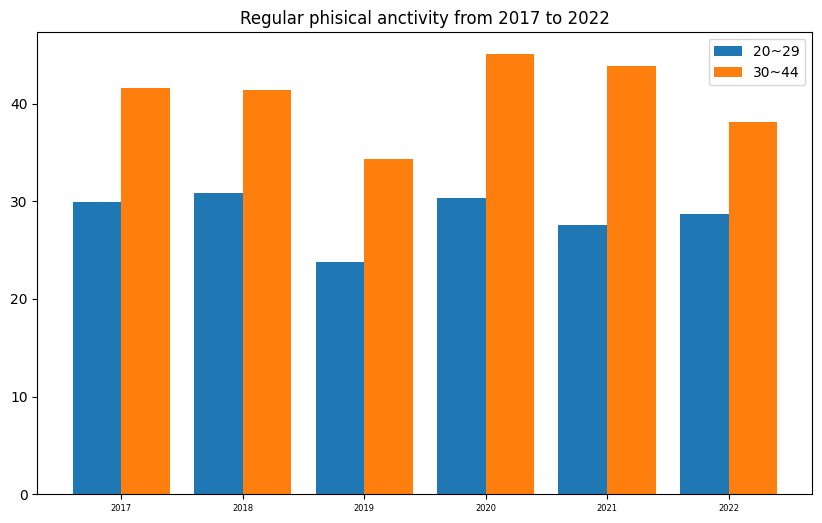

In [95]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y1 = exercise.iloc[0, 1:].values.astype("float")       # 첫 번째 데이터 세트
y2 = exercise.iloc[1, 1:].values.astype("float")+(exercise.iloc[2, 1:].values.astype("float"))/2
width = 0.4    
plt.figure(figsize= (10,6))
plt.bar(x - width/2, y1, width=width, label="20~29") 
plt.bar(x + width/2, y2, width=width, label="30~44") 
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 6)
plt.title("Regular phisical anctivity from 2017 to 2022")
plt.legend()
plt.show()

##### 음주량 데이터
###### 연령대 구분이 되어있지 않아서 사용하기 어려움

In [98]:
drink_amount = pd.read_csv("data\음주량_20241223120827.csv", encoding="cp949")
drink_amount.head()

,음주량별,2010,2010.1,2010.2,2011,2011.1,2011.2,2012,2012.1,2012.2,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,음주량별,전체,저소득,일반,전체,저소득,일반,전체,저소득,일반,...,일반,전체,저소득,일반,전체,저소득,일반,전체,저소득,일반
1,1~2잔 정도,25.10,30.90,24.30,23.56,27.58,23.03,22.96,29.97,22.10,...,24.02,25.28,26.82,25.11,24.29,27.07,24.00,22.87,26.22,22.58
2,3~4잔 정도,26.80,27.80,26.60,25.47,27.37,25.22,24.30,25.40,24.16,...,22.98,23.80,26.02,23.56,23.44,24.84,23.29,23.81,25.70,23.64
3,5~6잔 정도,17.00,14.30,17.40,16.07,13.34,16.43,15.14,16.14,15.02,...,13.35,14.62,16.26,14.44,14.70,12.85,14.90,19.56,17.25,19.76
4,7~9잔 정도,19.50,19.30,19.50,22.46,19.44,22.86,22.53,18.18,23.07,...,21.30,19.89,17.54,20.15,21.58,22.25,21.51,18.90,17.96,18.98


##### 연간 음주율 추이 데이터

In [70]:
drink = pd.read_csv("data\연간_음주율_추이_20241223121009.csv", encoding="cp949")
drink.head()

,성별(1),특성별(1),특성별(2),2010,2010.1,2010.2,2011,2011.1,2011.2,2012,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,성별(1),특성별(1),특성별(2),응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),...,표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차
1,전체,전체,19세이상,6198,77.7,0.7,6008,77.5,0.8,5591,...,0.8,5861,74.1,0.9,5636,72.4,0.9,5257,74.3,0.9
2,전체,전체,19세이상(표준화),6198,79.1,0.6,6008,79.3,0.6,5591,...,0.7,5861,78.1,0.7,5636,76.9,0.8,5257,78.9,0.7
3,전체,연령별1,19-29세,759,89.0,1.3,676,91.6,1.2,637,...,1.5,798,87.7,1.3,673,88.6,1.5,613,88.0,1.6
4,전체,연령별1,30-39세,1238,87.1,1.1,1093,86.5,1.2,960,...,1.4,766,85.9,1.5,646,84.7,1.7,664,85.8,1.6


In [80]:
drink_pr = drink[(drink["특성별(1)"]=="연령별1") & (drink["성별(1)"]=="전체")]
drink_pr = drink_pr[(drink_pr["특성별(2)"]=="19-29세") | (drink_pr["특성별(2)"]=="30-39세")|(drink_pr["특성별(2)"]=="40-49세")]
drink_pr = drink_pr[["특성별(2)","2017.1","2018.1","2019.1","2020.1","2021.1","2022.1"]]
drink_pr

,특성별(2),2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
3,19-29세,89.3,87.6,89.8,87.7,88.6,88.0
4,30-39세,87.0,86.3,85.8,85.9,84.7,85.8
5,40-49세,85.3,84.5,82.6,81.3,78.9,83.0


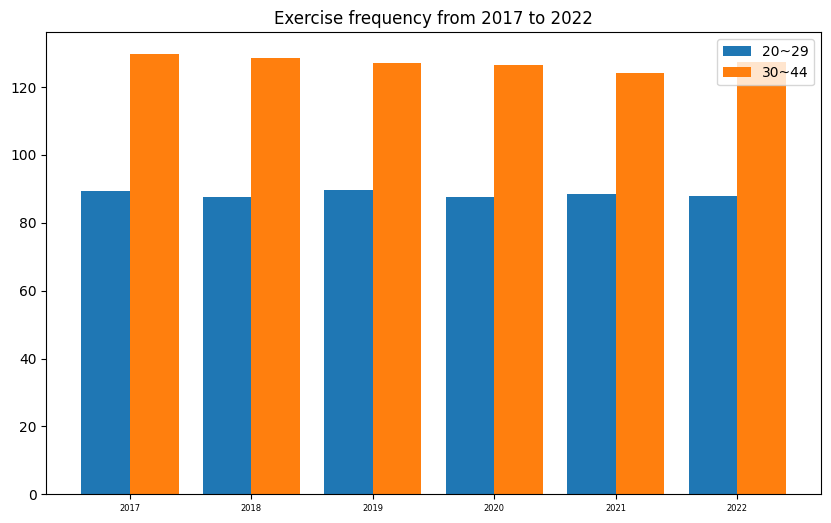

In [85]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y1 = drink_pr.iloc[0, 1:].values.astype("float")       # 첫 번째 데이터 세트
y2 = drink_pr.iloc[1, 1:].values.astype("float")+(drink_pr.iloc[2, 1:].values.astype("float"))/2
width = 0.4    
plt.figure(figsize= (10,6))
plt.bar(x - width/2, y1, width=width, label="20~29") 
plt.bar(x + width/2, y2, width=width, label="30~44") 
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 6)
plt.title("Exercise frequency from 2017 to 2022")
plt.legend()
plt.show()

##### 에너지 지방 과잉 섭취자 분율 추이

In [82]:
energy = pd.read_csv("data\에너지_지방과잉섭취자_분율_추이_20241223161158.csv",encoding="cp949")
energy.head()

,성별(1),특성별(1),특성별(2),2017,2017.1,2017.2,2018,2018.1,2018.2,2019,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,성별(1),특성별(1),특성별(2),응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),...,표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차
1,전체,전체,1세이상,7167,5.3,0.4,7064,5.5,0.4,7147,...,0.4,5808,6.8,0.4,5940,5.6,0.4,5830,5.5,0.4
2,전체,전체,19세이상,5721,5.4,0.4,5703,5.6,0.4,5772,...,0.4,4804,6.8,0.5,4973,5.6,0.4,4949,5.5,0.4
3,전체,전체,1세이상(표준화),7167,5.9,0.4,7064,6.0,0.4,7147,...,0.4,5808,7.5,0.5,5940,6.2,0.5,5830,5.8,0.4
4,전체,전체,19세이상(표준화),5721,6.1,0.5,5703,6.3,0.5,5772,...,0.5,4804,7.7,0.5,4973,6.4,0.5,4949,5.9,0.5


In [83]:
energy_pr = energy[(energy["특성별(1)"]=="연령별1") & (energy["성별(1)"]=="전체")]
energy_pr = energy_pr[(energy_pr["특성별(2)"]=="19-29세") | (energy_pr["특성별(2)"]=="30-39세")|(energy_pr["특성별(2)"]=="40-49세")]
energy_pr = energy_pr[["특성별(2)","2017.1","2018.1","2019.1","2020.1","2021.1","2022.1"]]
energy_pr

,특성별(2),2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
7,19-29세,7.4,7.3,9.9,5.9,9.0,7.5
8,30-39세,9.8,8.3,10.6,14.5,9.4,6.5
9,40-49세,6.3,7.2,7.1,6.3,3.9,4.9


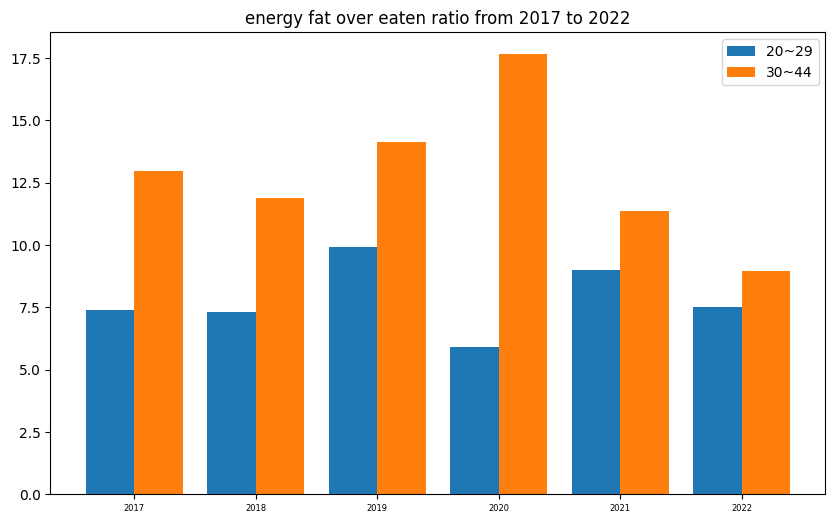

In [84]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y1 = energy_pr.iloc[0, 1:].values.astype("float")       # 첫 번째 데이터 세트
y2 = energy_pr.iloc[1, 1:].values.astype("float")+(energy_pr.iloc[2, 1:].values.astype("float"))/2
width = 0.4    
plt.figure(figsize= (10,6))
plt.bar(x - width/2, y1, width=width, label="20~29") 
plt.bar(x + width/2, y2, width=width, label="30~44") 
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 6)
plt.title("energy fat over eaten ratio from 2017 to 2022")
plt.legend()
plt.show()

##### 영양소별 1일 섭취량 추이 표준화 데이터

In [100]:
nutrition = pd.read_csv("data\영양소별_1일_섭취량_추이_표준화___만19세이상_20241223121447.csv")
nutrition

,성별(1),영양소별(1),영양소별(2),2010,2010.1,2011,2011.1,2012,2012.1,2013,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,성별(1),영양소별(1),영양소별(2),평균,표준오차,평균,표준오차,평균,표준오차,평균,...,평균,표준오차,평균,표준오차,평균,표준오차,평균,표준오차,평균,표준오차
1,전체,에너지 (kcal),소계,2126.0,18.4,2090.9,19.3,2057.1,22.6,2135.7,...,2042.6,19.4,2004.7,19.1,1959.2,19.6,1899.5,19.0,1862.8,16.5
2,전체,단백질 (g),소계,77.5,0.8,76.4,1.0,75.3,1.0,74.2,...,74.8,0.8,75.5,0.9,74.3,0.9,74.0,0.9,72.1,0.7
3,전체,지방 (g),소계,45.5,0.6,45.8,0.8,46.5,0.8,48.3,...,49.3,0.7,52.6,0.8,54.2,0.9,51.5,0.8,52.3,0.7
4,전체,포화지방산 (g),소계,-,-,-,-,-,-,14.2,...,16.0,0.3,17.0,0.3,17.5,0.3,16.5,0.3,16.6,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,여자,엽산 (㎍DFE),소계,-,-,-,-,-,-,-,...,275.9,3.7,277.8,3.9,265.8,3.9,267.9,3.7,269.5,3.6
90,여자,비타민C (mg),소계,106.8,3.1,103.3,2.4,106.2,3.2,98.6,...,54.7,1.5,66.0,2.2,60.3,1.8,59.8,1.8,66.9,2.9
91,여자,급원별 에너지 섭취분율 (%),단백질,14.3,0.1,14.3,0.1,14.5,0.1,14.0,...,15.0,0.1,15.4,0.1,15.2,0.1,15.8,0.2,16.0,0.1
92,여자,급원별 에너지 섭취분율 (%),지방,17.9,0.2,18.6,0.2,19.1,0.2,19.9,...,21.7,0.2,23.3,0.2,24.5,0.3,24.4,0.3,25.9,0.2


In [104]:
nutrition_pr = nutrition[(nutrition["영양소별(1)"]=="당 (g)")&(nutrition["성별(1)"]=="전체")]
nutrition_pr = nutrition_pr[["2017","2018","2019","2020","2021","2022"]]
nutrition_pr

,2017,2018,2019,2020,2021,2022
12,64.1,59.2,62.2,58.4,57.6,58.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


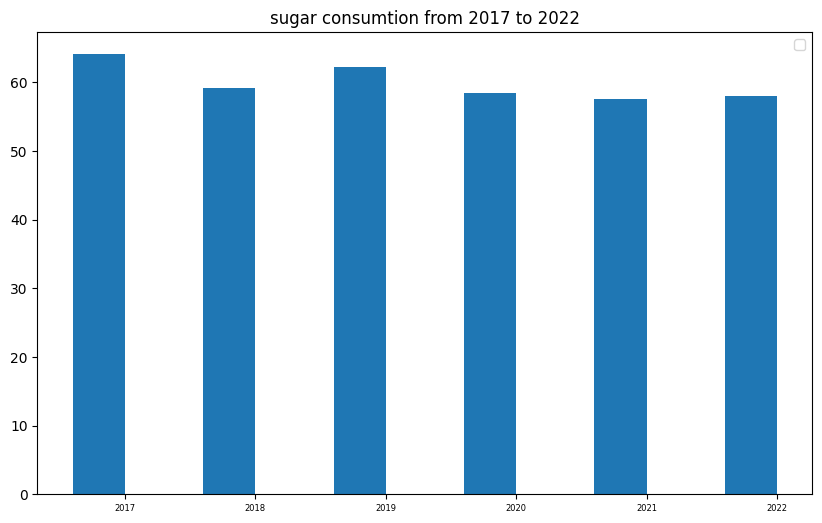

In [109]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
width = 0.4    
plt.figure(figsize= (10,6))
plt.bar(x - width/2, nutrition_pr.iloc[0,:].values.astype('float'), width=width) 
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 6)
plt.title('sugar consumtion from 2017 to 2022')
plt.legend()
plt.show()

##### 식품별 체중(kg)당 섭취량 분포

In [116]:
data_dict = {}
for i in range(2017, 2022):
    file_path = f'data\\{i} 식품별  체중kg당 섭취량분포-섭취자- 연령층별(전체) (19-29).csv'
    data_dict[f'data_{i}'] = pd.read_csv(file_path)

In [118]:
food_2017 =data_dict["data_2017"]
food_2018 =data_dict["data_2018"]
food_2019 =data_dict["data_2019"]
food_2020 =data_dict["data_2020"]
food_2021 =data_dict["data_2021"]

In [119]:
food_2017.head()

,식품군,식품,평균(g),표준오차(g),p1(g),p5(g),p10(g),p25(g),p50(g),p75(g),p90(g),p95(g),p99(g),n
0,곡류,귀리,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.13,590
1,곡류,기장,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,590
2,곡류,"메밀국수/냉면국수,생것",0.03,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.42,590
3,곡류,"메밀국수/냉면국수,삶은것",0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,590
4,곡류,"메밀국수/냉면국수,말린것",0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16,590


In [125]:
sugar_row = ["설탕","꿀","당밀/시럽","물엿/조청", "사탕","젤리","잼,딸기","초콜릿","빵,기타", "빵,도우넛", "과자,비스켓,쿠키",
       "샌드위치", "과자,스낵과자", "빵,잼,팥소 등", "빵,식빵", "초코파이", "빵,카스테라", "케이크",
       "케이크,생크림", "빵,크로켓"]
food_2017_pr = food_2017[food_2017["식품"].isin(sugar_row)]

In [129]:
print(food_2017[food_2017["식품군"]=="당류"]["식품"])

54         껌
55         꿀
56     당밀/시럽
57     물엿/조청
58        사탕
59        설탕
60        젤리
61       초콜릿
62      잼,딸기
63    매실,농축액
64        식초
Name: 식품, dtype: object


In [126]:
food_2017_pr

,식품군,식품,평균(g),표준오차(g),p1(g),p5(g),p10(g),p25(g),p50(g),p75(g),p90(g),p95(g),p99(g),n
16,곡류,"빵,기타",0.05,0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.55,590
17,곡류,"빵,도우넛",0.02,0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.67,590
18,곡류,"과자,비스켓,쿠키",0.10,0.02,0.0,0.0,0.0,0.0,0.00,0.00,0.24,0.55,2.31,590
19,곡류,샌드위치,0.07,0.02,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,3.47,590
20,곡류,"과자,스낵과자",0.05,0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.26,1.02,590
21,곡류,"빵,잼,팥소 등",0.10,0.02,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,3.06,590
22,곡류,"빵,식빵",0.11,0.02,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.71,3.02,590
23,곡류,초코파이,0.02,0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.52,590
24,곡류,"빵,카스테라",0.02,0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.63,590
25,곡류,케이크,0.03,0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.86,590


In [29]:
data_dict['data_2017']['식품'].unique()

array(['귀리', '기장', '메밀국수/냉면국수,생것', '메밀국수/냉면국수,삶은것', '메밀국수/냉면국수,말린것', '묵',
       '밀가루', '부침가루,튀김가루,믹스', '빵가루', '국수,말린것', '국수,삶은것', '라면', '우동',
       '자장면,인스턴트', '국수,생면', '칼국수,생면', '빵,기타', '빵,도우넛', '과자,비스켓,쿠키',
       '샌드위치', '과자,스낵과자', '빵,잼,팥소 등', '빵,식빵', '초코파이', '빵,카스테라', '케이크',
       '케이크,생크림', '빵,크로켓', '핫도그', '햄버거', '보리', '수수', '떡,팥소,시루떡 등', '시리얼',
       '현미', '백미', '찹쌀', '밥', '떡,가래떡/백설기', '떡,찹쌀', '옥수수', '조', '만두',
       '스프,가루,인스턴트', '라면,용기면', '감자', '감자칩', '감자튀김', '고구마', '곤약', '전분',
       '당면', '당면,삶은것', '껌', '꿀', '당밀/시럽', '물엿/조청', '사탕', '설탕', '젤리',
       '초콜릿', '잼,딸기', '매실,농축액', '식초', '강낭콩', '강낭콩,말린것', '대두', '두부', '순두부',
       '유부', '두유', '완두콩', '팥,말린것', '들깨', '땅콩', '밤', '아몬드', '잣', '깨,검정깨',
       '깨,흰깨', '해바라기씨', '호두', '호박씨', '아마씨', '가지', '고구마줄기', '고사리', '풋고추',
       '붉은고추', '고추장아찌', '고춧잎', '김치,갓김치', '김치,깍두기', '김치,동치미', '김치,배추김치',
       '김치,열무김치', '김치,열무물김치', '김치,총각김치', '김치,파김치', '깻잎', '깻잎/콩잎,장아찌',
       '녹색완두콩', '달래', '당근', '도라지', '마늘', '풋마늘', '무청', '무', '단무지', '무말랭이'